## Feature Selection 2: Wrapper
    
### See some references on Feature Selection such as:

https://machinelearningmastery.com/feature-selection-machine-learning-python/

https://scikit-learn.org/stable/modules/feature_selection.html

https://www.kaggle.com/jepsds/feature-selection-using-selectkbest

## Read the aggregated (clinical variables + speecg featores) excel file for exteme male cases

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [2]:
file = 'OSA_Aggregated_UPM.xlsx'
xl = pd.ExcelFile(file)
print(xl.sheet_names)

['Sheet1']


In [3]:
df_OSA_inner = xl.parse('Sheet1')

In [4]:
df_OSA_inner.head(2)

,Patient,Gender,IAH,Weight,Height,Age,Cervical,OSA,BMI,A_Form1,...,O_Ancho3,O_Ancho4,U_Form1,U_Form2,U_Form3,U_Form4,U_Ancho1,U_Ancho2,U_Ancho3,U_Ancho4
0,P0005,hombre,9.0,80,173,32,40,Healthy,26.729927,746.822118,...,164.953071,223.771504,328.075500,757.032914,2565.730496,3024.500134,74.718076,88.331369,128.496457,379.432142
1,P0006,hombre,2.0,109,190,32,42,Healthy,30.193906,741.095216,...,74.584464,216.244108,337.409601,735.000000,2532.000000,4132.186568,68.657539,192.000000,134.000000,264.337720


## NOTE:

<font color=red>Scikit-learn indeed does not support stepwise regression.</font> 
That's because what is commonly known as 'stepwise regression'
is an algorithm based on p-values of coefficients of linear regression,
and scikit-learn deliberately avoids inferential 
approach to model learning (significance testing etc). 

## Scikit-learn implements Recursive Feature Elimination

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

In [5]:
# Prepare X and Y data 

array = df_OSA_inner.values

# Select Features from columns 3 to 6 and 8 to 48
X = array[:,np.r_[3:7,8:49]]

# Classes are in possition 7 (OSA) 
Y = array[:,7]

In [6]:
# Feature Extraction with RFE

# Feature extraction
model = LogisticRegression(solver = 'liblinear')
rfe = RFE(model, 6)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Num Features: 6
Selected Features: [ True  True  True  True  True False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False]


In [7]:
predictors = df_OSA_inner.columns[np.r_[3:7,8:49]]

print("Selected Features: \n ", predictors[fit.support_])

Selected Features: 
  Index(['Weight', 'Height', 'Age', 'Cervical', 'BMI', 'I_Form1'], dtype='object')


In [8]:
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), predictors)))

Features sorted by their rank:
[(1, 'Age'), (1, 'BMI'), (1, 'Cervical'), (1, 'Height'), (1, 'I_Form1'), (1, 'Weight'), (2, 'U_Form1'), (3, 'E_Form1'), (4, 'U_Ancho1'), (5, 'A_Ancho2'), (6, 'I_Ancho2'), (7, 'A_Ancho1'), (8, 'O_Form3'), (9, 'O_Form1'), (10, 'O_Ancho2'), (11, 'E_Form2'), (12, 'U_Ancho4'), (13, 'U_Ancho3'), (14, 'O_Form2'), (15, 'A_Form1'), (16, 'A_Form2'), (17, 'E_Ancho1'), (18, 'U_Form3'), (19, 'E_Ancho2'), (20, 'O_Ancho4'), (21, 'O_Ancho1'), (22, 'U_Ancho2'), (23, 'I_Form3'), (24, 'I_Ancho3'), (25, 'I_Ancho1'), (26, 'I_Form4'), (27, 'E_Ancho3'), (28, 'A_Form4'), (29, 'E_Form3'), (30, 'I_Form2'), (31, 'A_Ancho4'), (32, 'O_Ancho3'), (33, 'A_Ancho3'), (34, 'U_Form2'), (35, 'U_Form4'), (36, 'O_Form4'), (37, 'E_Ancho4'), (38, 'I_Ancho4'), (39, 'E_Form4'), (40, 'A_Form3')]


## .... for more advanced:
* ### Try other more powerful models as SVM
* ### CrossValidation  <font color=red>what is "stratified folds" ? </font>

In [9]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel = "linear")
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2), scoring='accuracy', verbose=1)
rfecv.fit(X, Y)

Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 fe

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
      estimator=SVC(kernel='linear'), scoring='accuracy', verbose=1)

Optimal number of features : 6
Selected Features: 
  Index(['Weight', 'Height', 'Age', 'Cervical', 'BMI', 'I_Form1'], dtype='object')


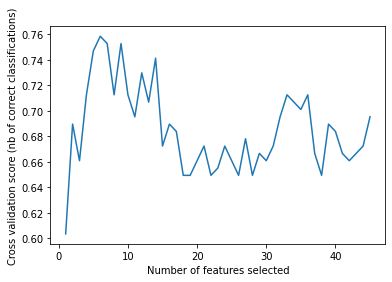

In [10]:
print("Optimal number of features : %d" % rfecv.n_features_) # Plot number of features VS. cross-validation scores

print("Selected Features: \n ", predictors[rfecv.support_])

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()